# Julian Lapenna Acoustics Lab

Sept 19, 16:20

Logged on. I don't see a `BareBonesDAQ.m` file... Maybe a python file has replaced it

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [12]:
from scipy.io import wavfile
samplerate, data = wavfile.read('./resonant.wav')
print(data.shape)
print ("Frequency sampling:", samplerate)

(480000, 2)
Frequency sampling: 96000


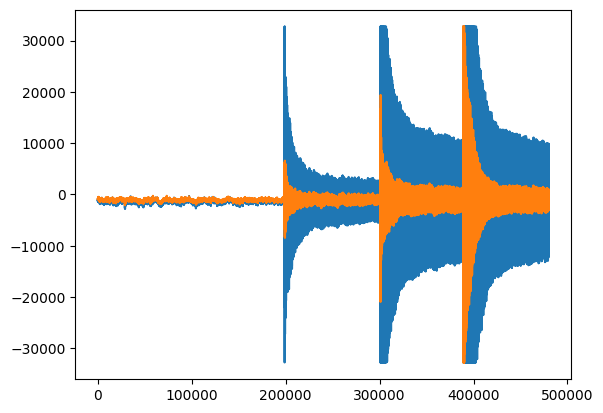

In [5]:
plt.plot(data)

In [10]:
print(data[200000]) # looks about right with graph above

[8412  116]


File naming convention (for future):

pXXXXX-fXXXXX-aXX-tXXX-X.wav = p\<position\>-f\<frequency\>-a\<amplitude\>-t\<time\>-\<close\far\>.wav

In [27]:
data1 = []

for d in data:
    data1.append(d[0])

print(len(data1))

480000


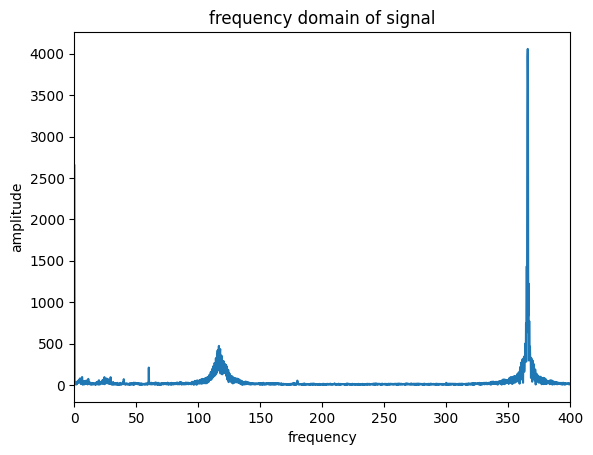

In [34]:
# finding the resonant frequency
from scipy.fft import fft, fftfreq
N = 480000 # sample points
T = 5.0 / N
x = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(data1)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('frequency domain of signal')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim([0,400])
plt.show()

In [37]:
print("resonant frequency:", xf[np.argmax(yf)], "Hz")

resonant frequency: 365.20000000000005 Hz


So the resonant frequency of the tuning fork is 365 Hz! Great :)